# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [40]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [41]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [42]:
# Get the dataset

filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [43]:
df.shape

(1973, 2)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [44]:
# Prep for training and testing dataset

y = df["Positive Review"]
X = df["Review"]

X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [45]:
y.head()

0     True
1     True
2     True
3    False
4     True
Name: Positive Review, dtype: bool

In [46]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [47]:
X_train.head()

1369    As my brother said when flipping through this ...
1366    Cooper's book is yet another warm and fuzzy ma...
385     I have many robot books and this is the best a...
750     As China re-emerges as a dominant power in the...
643     I have been a huge fan of Michael Crichton for...
Name: Review, dtype: object

In [48]:
y_train.head()

1369    False
1366    False
385      True
750      True
643     False
Name: Positive Review, dtype: bool

In [49]:
# vectorization to transform text to numeric 

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [50]:
# get the dimensionality of input layer 

vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [51]:
# YOUR CODE HERE

# Create nn 
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

# nn_model.add(keras.layers.Dropout(.25))

# Print summary of neural network model structure
nn_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1217920   
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 1,220,545
Trainable params: 1,220,545
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Optimize 

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [53]:
# Compile model 

nn_model.compile(optimizer=sgd_optimizer,loss=loss_fn, metrics=['accuracy'] )

In [54]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [55]:
t0 = time.time() # start time

num_epochs = 50 #epochs


history = nn_model.fit(X_train_tfidf.toarray(), y_train, 
                       epochs=num_epochs,verbose=0, 
                       callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)],  
                       validation_split=0.2)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [50/ 50], Loss: 0.0014, Accuracy: 1.0000, Val_loss: 0.5716, Val_accuracy: 0.8070
Elapsed time: 18.97s


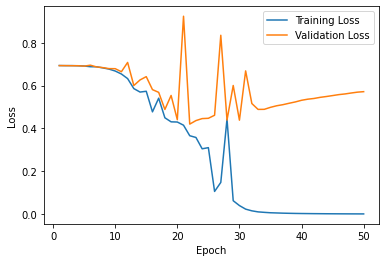

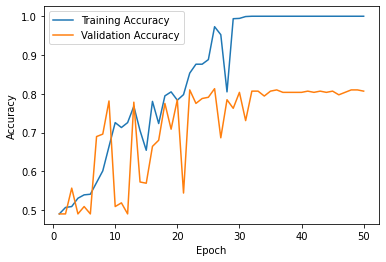

In [56]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)


print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

13/13 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.8278
Loss:  0.5697352290153503 Accuracy:  0.8278480768203735


Observation: 
By adding this line `nn_model.add(keras.layers.Dropout(.25))`, we are dropping layers and it will reduce overfitting as the gap between training and validation loss will reduce. However, it will lower the accuracy. 
Moreover, adding more number of epochs will increase overfiting while decreasing it will lead to underfitting. 

In [58]:
# Make predictions on test set

probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.9985664]			Good Review
[0.94432974]			Good Review
[0.5514518]			Good Review
[0.05453858]			Bad Review
[0.8923304]			Good Review
[0.9179187]			Good Review
[0.00302142]			Bad Review
[3.308694e-05]			Bad Review
[0.99949443]			Good Review
[0.99925524]			Good Review


In [60]:
# Comparing the predictions from testset with our predictions 

print('Review #1:\n')
print(X_test.to_numpy()[25])

goodReview = True if probability_predictions[25] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[25]))

Review #1:

I echo the comments of the previous reviewers.  Don't waste your money.  Not only does this book present a tedious repetition of facts and stories already well known to even a casual U2 fan, it can't even get those facts right!  The book states that Bono's father dropped the family off at a Catholic Church before driving himself to another church.  This contradicts the correct statement on the preceding page that Bob Hewson was Catholic, while Bono, his mother and brother were Protestant.  In the same paragraph the Dublin neighborhood of "Glasnevin" is misspelled "Asnevin".  The hearing aid shop from which Bono took his name is misspelled, and perhaps most galling of all, the author can't even get the full name of Larry Mullen, Jr. right!  And this is just chapter one!  

I have to agree that this book was simply thrown together to make a quick buck and therefore not worth purchasing.  I would suggest skipping this one and purchasing Bono: In Conversation With Michka Assaya

In [63]:
print('Review #2:\n')
print(X_test.to_numpy()[100])

goodReview = True if probability_predictions[100] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[100]))

Review #2:

This classic chronicle of Presidential campaigns, from the get-go to contemporary times, has the unusual virtue of being useful either as a collection of short readable chapters - each just the right size for a daily bus or train ride - or as a reference source. Reading this in the wake of Monicagate and the Florida Recount, it's instructive to read the history of Grover Cleveland, who seems to have features of BOTH past Democratic candidates. Like Clinton, he had his scandals - fathering an illegitimate child. Like Gore, his career was rudely interrupted by an election which he won on popular votes but lost, in a hotly contested, knife-edge electoral college tally


Prediction: Is this a good review? True

Actual: Is this a good review? True

